In [15]:
import scipy.io as spio
import numpy as np
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
import h5py
import pandas as pd
Data = spio.loadmat('Folder.mat', squeeze_me=True,struct_as_record=True)
train_data=[]
train_data.append(Data['Folder1'])
train_data.append(Data['Folder2'])
train_data.append(Data['Folder3'])
train_data.append(Data['Folder4'])
train_data.append(Data['Folder5'])
train_data.append(Data['Folder6'])
train_data.append(Data['Folder7'])
train_label=np.load('train_label.npy')
for i in range(7):
    _,_,s=train_data[i].shape
    train_data[i]=np.reshape(train_data[i],(14,s))
    train_data[i]=train_data[i].T
    train_data[i]=np.reshape(train_data[i],(s,1,14))
    print(train_data[i].shape)
    print(len(train_label[i]))
for i in range(7):
    train_label[i]=to_categorical(train_label[i])
f=[]
f.append(h5py.File('t1.mat'))
f.append(h5py.File('t2.mat'))
f.append(h5py.File('t3.mat'))
f.append(h5py.File('t4.mat'))
f.append(h5py.File('t5.mat'))
f.append(h5py.File('t6.mat'))
f.append(h5py.File('t7.mat'))
print(len(f[0]['color']['kT'][0]))#430874.548060

(13494, 1, 14)
13494
(13494, 1, 14)
13494
(13495, 1, 14)
13495
(13497, 1, 14)
13497
(13497, 1, 14)
13497
(13496, 1, 14)
13496
(13497, 1, 14)
13497
13494


In [ ]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
def addFeature(Data):
    s,a=Data.shape
    newData=np.zeros((s,22))
    newData[:,:14]=Data
    for i in range(s):
        newData[i,14]=((Data[i,2]-Data[i,6])**2+(Data[i,3]-Data[i,7])**2)**0.5
        newData[i,15]=((Data[i,4]-Data[i,8])**2+(Data[i,5]-Data[i,9])**2)**0.5
        newData[i,16]=((Data[i,6]-Data[i,10])**2+(Data[i,7]-Data[i,11])**2)**0.5
        newData[i,17]=((Data[i,8]-Data[i,12])**2+(Data[i,9]-Data[i,13])**2)**0.5
        v1=[Data[i,6]-Data[i,2],Data[i,7]-Data[i,3]]
        v2=[Data[i,10]-Data[i,6],Data[i,11]-Data[i,7]]
        newData[i,18]=angle_between(v1,v2)

        v1=[Data[i,8]-Data[i,4],Data[i,9]-Data[i,5]]
        v2=[Data[i,12]-Data[i,8],Data[i,13]-Data[i,9]]
        newData[i,19]=angle_between(v1,v2)

        newData[i,20]=0
        newData[i,21]=0
    return newData
test=np.reshape(train_data[0],(13494,14))
print(test)
test=addFeature(test)
print(test[:,:14])
#print(angle_between([1,0],[-1,-1]))
#print(angle_between([1,0],[-1,1]))

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)
def trainLSTM(train_data,train_label,Hidden_unit,batch_s):
    model = Sequential()
    model.add(LSTM(Hidden_unit, input_shape=(1, 14)))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    for i in range(len(train_data)):
        model.fit(train_data[i],train_label[i], batch_size=batch_s, epochs=10)
    return model

## Add path to custom libraries
#module_path = '/home/kali/pgabriel-dev/thesis/scripts/python/'
#if module_path not in sys.path:
#    sys.path.append(module_path)  
#    
## Add custom libraries
#from pyFreeBe.utils import load, libviz

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
#    sns.set_context("paper", font_scale=2)
    sns.set(font_scale=2)

    fig, ax = plt.subplots(1)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 fontsize=24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.grid(False)
    
    
    
    return fig
def toIntegerLabel(l):
    label=[]
    s,_=l.shape
    for i in range(s):
        label.append(l[i].tolist().index(max(l[i].tolist())))
    return label
def toOnOffSet(integerLabel):
    onoff=[]
    lmsk = [(el==1) or (el==3) for el in integerLabel]
    Rmsk = [(el==2) or (el==3) for el in integerLabel]
    i=0
    while i<len(lmsk):
        if lmsk[i]:
            temp=[]
            temp.append('l')
            temp.append(i)
            for j in range(i,len(lmsk)):
                if not lmsk[j]:
                    temp.append(j-1)
                    onoff.append(temp)
                    i=j
                    break
        i+=1
    i=0
    while i<len(Rmsk):
        if Rmsk[i]:
            temp=[]
            temp.append('r')
            temp.append(i)
            for j in range(i,len(Rmsk)):
                if not Rmsk[j]:
                    temp.append(j-1)
                    onoff.append(temp)
                    i=j
                    break
        i+=1
    return onoff
def toPanda_test(model,train_data,whichFolder,f):
    #print(whichFolder)
    #print(model.predict(train_data[whichFolder]))
    IntegerLabel=toIntegerLabel(model.predict(train_data[whichFolder]))
    OnOff=toOnOffSet(IntegerLabel)
    df=[]
    for i in range(len(OnOff)):
        OnOff[i][1]=f[whichFolder]['color']['kT'][0][OnOff[i][1]]/1000
        OnOff[i][2]=f[whichFolder]['color']['kT'][0][OnOff[i][2]]/1000
        df.append(pd.DataFrame(data={'onset':[OnOff[i][1]],  'offset':[OnOff[i][2]],  'label':[OnOff[i][0]]}))
    df = pd.concat(df, axis=0)
    df.sort_values(by=('onset'), inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df
def toPanda_train(train_label,whichFolder,f):
    IntegerLabel=toIntegerLabel(train_label[whichFolder])
    OnOff=toOnOffSet(IntegerLabel)
    df=[]
    for i in range(len(OnOff)):
        OnOff[i][1]=f[whichFolder]['color']['kT'][0][OnOff[i][1]]/1000
        OnOff[i][2]=f[whichFolder]['color']['kT'][0][OnOff[i][2]]/1000
        df.append(pd.DataFrame(data={'onset':[OnOff[i][1]],  'offset':[OnOff[i][2]],  'label':[OnOff[i][0]]}))
    df = pd.concat(df, axis=0)
    df.sort_values(by=('onset'), inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df
#print(toPanda_test(model,train_data,0,f))
#print(toPanda_train(train_label,0,f))
def score_periods(df_manual, df_pred, params=None, err1thresh=2, err2thresh=5):
    
    # initialize storage variables/arrays
    err1 = np.empty(len(df_manual)) # err1
    err2 = np.empty(len(df_manual)) # err2
    detected = np.zeros(len(df_manual), dtype=bool) # detected
    
    # Loop through each manual
    for i, (label, offset, onset) in df_manual.iterrows():
                
        # search for nearest neighbor in df_pred
        pred_onsets = df_pred['onset'].values
        pred_offsets = df_pred['offset'].values
        
        i_onset_match = np.argmin(np.abs(pred_onsets-onset))
        i_offset_match = np.argmin(np.abs(pred_offsets - offset))
        
        if label=='b' or i_onset_match != i_offset_match:
            err1[i] = np.nan
            err2[i] = np.nan
            detected[i] = False
            continue
        
        # calculate onset and offset error (err1, err2)
        err1[i] = onset - pred_onsets[i_onset_match]
        err2[i] = offset - pred_offsets[i_offset_match]
        if np.abs(err1[i])>err1thresh or np.abs(err2[i])>err2thresh:
            detected[i] = False
        else:
            detected[i]=True

    df_return = df_manual.copy()
    df_return['err1'] = err1
    df_return['err2'] = err2
    df_return['detected'] = detected
    
    return df_return

In [30]:
## Changing Params Here
def trainning(train_data, train_label,f,params):
    result=[]
    pred=[]
    for i in range(4):
        train_set=[]
        train_set_label=[]
        test_folder=i
        for j in range(4):
            if j!=i:
                train_set.append(train_data[j])
                train_set_label.append(train_label[j])
        model=trainLSTM(train_set, train_set_label, params[0],params[1])
        df_manual=toPanda_train(train_label,test_folder,f)
        df_pred=toPanda_test(model,train_data,test_folder,f)
        df_results = score_periods(df_manual, df_pred)
        pred.append(df_pred)
        result.append(df_results)
    return result,pred

In [31]:
params=[64,15]
result,pred=trainning(train_data,train_label,f,params)
man=[]
for i in range(4):
    man.append(toPanda_train(train_label,i,f))

Epoch 1/10
13494/13494 [==============================] - 6s 438us/step - loss: 0.4916 - acc: 0.8962
Epoch 2/10
13494/13494 [==============================] - 4s 306us/step - loss: 0.3960 - acc: 0.8996
Epoch 3/10
13494/13494 [==============================] - 4s 319us/step - loss: 0.4031 - acc: 0.9005
Epoch 4/10
13494/13494 [==============================] - 4s 329us/step - loss: 0.3729 - acc: 0.9065
Epoch 5/10
13494/13494 [==============================] - 4s 322us/step - loss: 0.3657 - acc: 0.9094
Epoch 6/10
13494/13494 [==============================] - 4s 310us/step - loss: 0.3641 - acc: 0.9086
Epoch 7/10
13494/13494 [==============================] - 4s 295us/step - loss: 0.3616 - acc: 0.9117
Epoch 8/10
13494/13494 [==============================] - 4s 304us/step - loss: 0.3696 - acc: 0.9086
Epoch 9/10
13494/13494 [==============================] - 4s 308us/step - loss: 0.3554 - acc: 0.9131
Epoch 10/10
13494/13494 [==============================] - 4s 323us/step - loss: 0.3498 - a

13497/13497 [==============================] - 4s 317us/step - loss: 0.8338 - acc: 0.7243
Epoch 2/10
13497/13497 [==============================] - 4s 300us/step - loss: 0.6995 - acc: 0.7714
Epoch 3/10
13497/13497 [==============================] - 4s 315us/step - loss: 0.6797 - acc: 0.7741
Epoch 4/10
13497/13497 [==============================] - 4s 305us/step - loss: 0.6626 - acc: 0.7771
Epoch 5/10
13497/13497 [==============================] - 4s 311us/step - loss: 0.6472 - acc: 0.7841
Epoch 6/10
13497/13497 [==============================] - 4s 307us/step - loss: 0.6341 - acc: 0.7843
Epoch 7/10
13497/13497 [==============================] - 4s 322us/step - loss: 0.6345 - acc: 0.7854
Epoch 8/10
13494/13494 [==============================] - 5s 402us/step - loss: 0.8760 - acc: 0.7304
Epoch 2/10
13494/13494 [==============================] - 4s 325us/step - loss: 0.8153 - acc: 0.7446
Epoch 3/10
13494/13494 [==============================] - 4s 314us/step - loss: 0.7918 - acc: 0.7472
E

(0, 10)

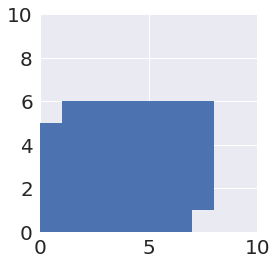

In [55]:
folder=1
df_pred=pred[folder]
df_manual=man[folder]
kT=f[folder]['color']['kT'][0]
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
a=[0,0]
b=[0,5]
c=[7,0]
d=[7,5]
width = c[0] - a[0]
height = d[1] - a[1]
lims = (0, 10)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), width, height))
ax1.add_patch(
    patches.Rectangle((1, 1), width, height))
plt.ylim(lims)
plt.xlim(lims)


In [47]:
pred[0].to_pickle('df_pred1.dat')
pred[1].to_pickle('df_pred2.dat')
pred[2].to_pickle('df_pred3.dat')
pred[3].to_pickle('df_pred4.dat')
a=pd.read_pickle('df_pred1.dat')
print(result[1])

   label         offset          onset        err1        err2  detected
0      l  431774.517403  431772.851481 -129.465501 -135.199552     False
1      l  431793.651407  431791.784340 -110.532642 -116.065548     False
2      r  431911.983951  431902.183981   -0.133001    2.266997      True
3      l  431906.851042  431903.916978    1.599996   -2.865913      True
4      r  431952.050903  431946.383842   -0.133011    4.799991      True
5      l  432011.183628  432003.716717         NaN         NaN     False
6      r  432011.050703  432004.183651         NaN         NaN     False
7      r  432020.650674  432014.383617    6.399978   12.399957     False
8      r  432070.383439  432068.383440   60.399801   62.132722     False
9      r  432080.183408  432073.916494   65.932854   71.932691     False
10     r  432190.050130  432183.716137         NaN         NaN     False
11     l  432190.183049  432185.183064         NaN         NaN     False
12     r  432215.916041  432213.382975   27.199911 

20.0
20
Confusion matrix, without normalization
[[20  0]
 [ 4  0]]
MSE1: 8482.99661532 [s], MSE: 9121.94570157 [s]


/home/nathan/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nathan/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.0 1.2


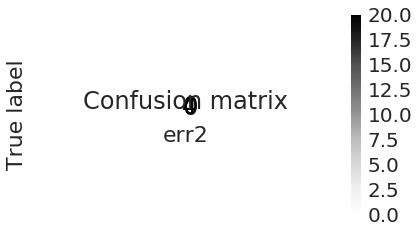

In [45]:
#%% Summarize results
# declare variables
folder=1
df_pred=pred[folder]
df_man=man[folder]
df_result=result[folder]
N_pred = float(len(df_pred))
N_man = float(len(df_manual))
print(N_man)
TP = np.sum(df_results['detected'])
print(TP)
FP = N_pred - TP
TN = 0
FN = N_man - TP

cm = np.array([[TP, FP], [FN, TN]], dtype='int').T

plot_confusion_matrix(cm, ('', ''))

#%% Plot distributions of error

sns.distplot(df_results['err1'].dropna())
sns.distplot(df_results['err2'].dropna())

#%% Calculate MSE
MSE1 = df_results['err1'].dropna().mean() + df_results['err1'].dropna().std()**2
MSE2 = df_results['err2'].dropna().mean() + df_results['err2'].dropna().std()**2

print "MSE1: {0} [s], MSE: {1} [s]".format(MSE1, MSE2)

#%% TP / N_man
rateP = TP / N_man
ratioP = N_pred / N_man

print rateP, ratioP

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 25 10:35:58 2018

@author: Paolo Gabriel
"""
#%%
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.lines as mlines

#  === Angle functions ===

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2, deg=True):
    """ Returns the anti-clockwise angle in degrees between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """

    def inner_angle(v, w):
        cross = np.cross(v, w)
        cosang = np.dot(v, w)
        sinang = np.linalg.norm(cross)
        return np.arctan2(sinang, cosang)
    
    def determinant(v,w):
        return v[0]*w[1]-v[1]*w[0]
    
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    angle = inner_angle(v1_u, v2_u)
    det = determinant(v1_u, v2_u)
    
    if det < 0: angle = 2*np.pi - angle

    if deg: angle = angle * 180/np.pi
    
    return angle

def get_axillary_angle(base, rotator):
    """ Returns the shoulder angle in degrees between vectors 'base' (static) and 'rotator' after checking the direction of 'base'::

    """
    if base[0] > 0:
        return angle_between(rotator, base)
    else:
        return angle_between(base, rotator)
    
def get_elbow_angle(base, rotator):
    """ Returns the elbow angle in degrees between vectors 'base' (static) and 'rotator'::

    """
    return min(angle_between(rotator, base), angle_between(base, rotator))
# == / Angle functions / ==

# == Extra functions ==
def gen_rand_vecs(dims, number):
    vecs = np.random.normal(size=(number,dims))
    mags = np.linalg.norm(vecs, axis=-1)

    return vecs / mags[..., np.newaxis]

def plot_angles(ax, base, rotator):
    angle1 = angle_between((1,0), base) 
    angle2 = angle_between((1,0), rotator)
    
    l1 = mlines.Line2D([0,base[0]], [0, base[1]], color='k')
    l2 = mlines.Line2D([0,rotator[0]], [0, rotator[1]], color='b')
    
    return l1, l2, angle1, angle2

# NOTE: plot_arcs is bugged! 
#   Angles calculated are correct, but the way to plot arcs requires some logic 
#   regarding the relationship between v1 and v2
def plot_arcs(ax, v1, v2, offset1, offset2):
    theta1 = get_elbow_angle(v1, v2)
    theta2 = get_axillary_angle(v1, v2)
    
    if offset2 - offset1 > 180:
        e_offset = max(offset1, offset2)
    else:        
        e_offset = min(offset1, offset2)
    
    if offset2 - offset1 < theta2:
        a_offset = max(offset1, offset2)
    else:
        a_offset = min(offset1, offset2)

    arc1 = Arc([0,0], 0.5, 0.5, angle=0, theta1=e_offset, theta2=e_offset+theta1, color='g')
    arc2 = Arc([0,0], 0.75, 0.75, angle=0, theta1=a_offset, theta2=a_offset+theta2, color='r')

    
    return arc1, arc2, theta1, theta2

def run_demo():
    plt.close('all')
    # generate simulated data
    v1 = np.array((-1, 0)) # simulation of RS -> LS (shoulder to shoulder) vector
    v2s = ((1,0), (1,1), (0,1), (-1,1), (-1,0) , (-1,-1), (0, -1), (1,-1)) # simulation of fixed angles of RS->RE (shoulder to elbow)
    
    # plot simulated data
    for i, v2 in enumerate(v2s):
        fig, ax = plt.subplots(1)
        
        l1, l2, offset1, offset2 = plot_angles(ax, v1, v2)
        arc1, arc2, theta1, theta2 = plot_arcs(ax, v1, v2, offset1, offset2)
                
        ax.add_patch(arc1)
        ax.add_patch(arc2)
        ax.add_line(l1)
        ax.add_line(l2)
    
        ax.legend(('Base', 'Rotator', 'elbow angle = {0} deg'.format(theta1), 'shoulder angle = {0} deg'.format(theta2)))
    
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)    
        ax.set_aspect('equal')

    fig.tight_layout()
    plt.show()

#if __name__ == "__main__":
run_demo()

